# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** [Deep Learning]

**Lab Title:** Research Paper Implementation with Pre-trained Model (Faster R-CNN: Towards Real-Time Object
Detection with Region Proposal Networks)



**Date of Submission:** [25-03-25]

**Group Members**: [Gourav Sable,Nabil Ansari,Arya Sadalage]


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Research Paper : Faster R-CNN: Towards Real-Time Object
Detection with Region Proposal Networks**

Research Paper link : https://arxiv.org/pdf/1506.01497
Dataset : Pascal VOC 2012

**About Reseach Paper**

Faster R-CNN improves object detection by introducing a Region Proposal Network (RPN) that shares convolutional features with the detection network, eliminating region proposal bottlenecks. The RPN, a fully convolutional network, predicts object locations and scores, generating high-quality proposals for Fast R-CNN. By merging RPN and Fast R-CNN into a single network, it effectively directs attention to key regions. Using a deep VGG-16 model, it achieves 5fps on a GPU with state-of-the-art accuracy on PASCAL VOC and MS COCO. Faster R-CNN and RPN were key in winning ILSVRC and COCO 2015 competitions, with code publicly available.


In [ ]:
# Install necessary dependencies
!pip install torch torchvision torchaudio
!pip install opencv-python matplotlib

import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load pre-trained Faster R-CNN
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.to(device).eval()  # Set to evaluation mode


Using device: cuda


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 179MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

In [ ]:
# code of Task 2
import torchvision.datasets as dset

# Download Pascal VOC 2012
dataset = dset.VOCDetection(root="./data", year='2012', image_set='train', download=True)
print("Dataset downloaded successfully!")


100%|██████████| 2.00G/2.00G [01:20<00:00, 24.9MB/s]


Dataset downloaded successfully!


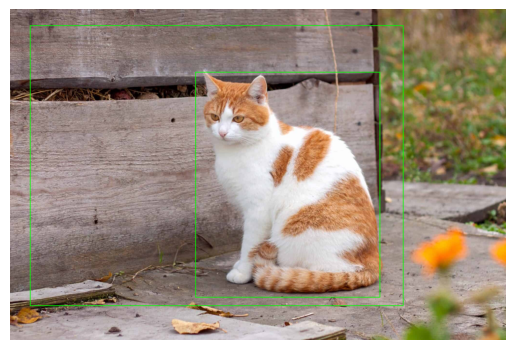

[{'boxes': tensor([[ 766.2462,  260.2723, 1527.4480, 1188.2075],
        [  83.8126,   68.4288, 1623.6123, 1223.8461],
        [   5.6737,   32.6855, 1598.8209,  554.1675],
        [ 354.3956,  728.5803, 2026.1512, 1360.7153],
        [   4.7591, 1109.2352,  433.0006, 1271.7257]], device='cuda:0'), 'labels': tensor([17, 15, 15, 15, 15], device='cuda:0'), 'scores': tensor([0.9992, 0.5368, 0.1277, 0.0741, 0.0529], device='cuda:0')}]


In [ ]:

# Function to load and preprocess an image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)
    return image, image_tensor

# Test image
image_path = "/content/th.jpg"  # Replace with an actual image path
image, image_tensor = load_image(image_path)

# Run inference
with torch.no_grad():
    predictions = model(image_tensor)

# Display results
def plot_predictions(image, predictions, threshold=0.5):
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    for i, box in enumerate(boxes):
        if scores[i] > threshold:
            cv2.rectangle(image,
                          (int(box[0]), int(box[1])),
                          (int(box[2]), int(box[3])),
                          (0, 255, 0), 2)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

plot_predictions(image, predictions)
print(predictions)


In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained Faster R-CNN model
num_classes = 21  # Pascal VOC has 20 classes + 1 background
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# Modify the classifier for Pascal VOC
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

model.to(device)
print("Model modified for Pascal VOC dataset!")


Model modified for Pascal VOC dataset!


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load Pascal VOC dataset
def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
print("DataLoader ready!")


DataLoader ready!


In [ ]:
import torch
import torchvision
from torch.utils.data import Subset
from torchvision.datasets import VOCDetection
from torchvision import transforms  # Import transforms

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the transform to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Define dataset with transform applied
dataset = VOCDetection(root="./data", year="2012", image_set="train", transform=transform)

# Reduce dataset size (use only first 200 images)
small_dataset = Subset(dataset, range(200))

# DataLoader with custom collate function
train_loader = torch.utils.data.DataLoader(small_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Load Faster R-CNN model and move it to the correct device
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.to(device)

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 20
model.train()

for epoch in range(num_epochs):
    for images, targets in train_loader:
        # Move images to device
        images = [img.to(device) for img in images]

        formatted_targets = []
        for target in targets:
            target_boxes = []
            target_labels = []

            for obj in target['annotation']['object']:
                bndbox = obj["bndbox"]
                bbox = torch.tensor([float(bndbox["xmin"]), float(bndbox["ymin"]),
                                     float(bndbox["xmax"]), float(bndbox["ymax"])],
                                    dtype=torch.float32, device=device)
                label = torch.tensor([1 if obj['name'] != 'background' else 0],
                                     dtype=torch.int64, device=device)

                target_boxes.append(bbox)
                target_labels.append(label)

            # Ensure boxes and labels are tensors before passing to model
            formatted_targets.append({
                "boxes": torch.stack(target_boxes) if target_boxes else torch.empty((0, 4), dtype=torch.float32, device=device),
                "labels": torch.tensor(target_labels, dtype=torch.int64, device=device) if target_labels else torch.empty((0,), dtype=torch.int64, device=device)
            })

        optimizer.zero_grad()
        loss_dict = model(images, formatted_targets)  # Model expects both images & targets on the same device
        loss = sum(loss for loss in loss_dict.values())
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/20], Loss: 0.3392
Epoch [2/20], Loss: 0.4699
Epoch [3/20], Loss: 0.2896
Epoch [4/20], Loss: 0.3412
Epoch [5/20], Loss: 0.2319
Epoch [6/20], Loss: 0.0452
Epoch [7/20], Loss: 0.0779
Epoch [8/20], Loss: 0.1047
Epoch [9/20], Loss: 0.0499
Epoch [10/20], Loss: 0.1778
Epoch [11/20], Loss: 0.0393
Epoch [12/20], Loss: 0.1056
Epoch [13/20], Loss: 0.0358
Epoch [14/20], Loss: 0.1196
Epoch [15/20], Loss: 0.1162
Epoch [16/20], Loss: 0.0482
Epoch [17/20], Loss: 0.1326
Epoch [18/20], Loss: 0.2236
Epoch [19/20], Loss: 0.0911
Epoch [20/20], Loss: 0.1046


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

Updated Length of all_targets: 50
Updated Length of all_preds: 50
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 4 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Precision: 0.8060
Recall: 0.7950
F1-score: 0.7840


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


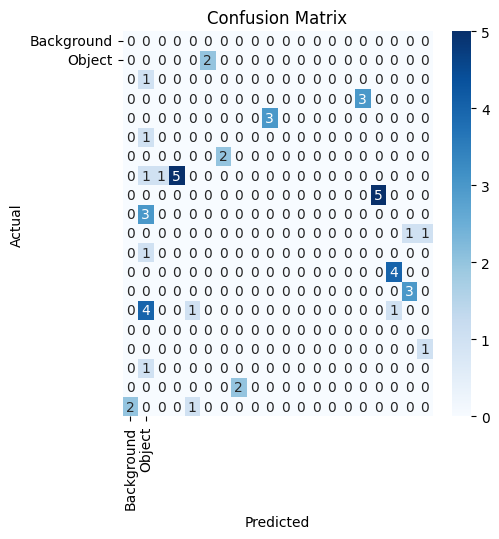

In [27]:
##Code for Task 3
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
from torchvision.datasets import VOCDetection
from torchvision import transforms
from torch.utils.data import Subset

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
model.to(device)
model.eval()  # Set to evaluation mode

# Load dataset (use test set for evaluation)
transform = transforms.Compose([transforms.ToTensor()])
test_dataset = VOCDetection(root="./data", year="2012", image_set="val", transform=transform)


# Reduce dataset size (for quick evaluation)
small_test_dataset = Subset(test_dataset, range(50))
test_loader = torch.utils.data.DataLoader(small_test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Store results
all_preds = []
all_targets = []

# Class to index mapping for Pascal VOC
class_to_idx = {
    'background': 0,
    'aeroplane': 1,
    'bicycle': 2,
    'bird': 3,
    'boat': 4,
    'bottle': 5,
    'bus': 6,
    'car': 7,
    'cat': 8,
    'chair': 9,
    'cow': 10,
    'diningtable': 11,
    'dog': 12,
    'horse': 13,
    'motorbike': 14,
    'person': 15,
    'pottedplant': 16,
    'sheep': 17,
    'sofa': 18,
    'train': 19,
    'tvmonitor': 20
}


for images, targets in test_loader:  # Inference loop
    images = [img.to(device) for img in images]  # Move images to device
    outputs = model(images)  # Get predictions

    for i in range(len(images)):
        # Get predicted class with highest confidence (for object detection)
        # Keep only predictions within Pascal VOC's class range (1-20)
        pred_labels = [label for label in outputs[i]["labels"].cpu().numpy() if label in class_to_idx.values()]


        # Get ground truth labels
        # The target is a dictionary, access 'annotation', then 'object', then iterate to get labels
        true_labels = []
        for obj in targets[i]['annotation']['object']:
            # Convert class name to index using the mapping
            true_labels.append(class_to_idx[obj['name']])

        # Append only one label per image (prevent mismatched lengths)
        all_preds.append(pred_labels[0] if len(pred_labels) > 0 else 0)
        all_targets.append(true_labels[0] if len(true_labels) > 0 else 0)

# Ensure lengths match before computing metrics
print(f"Updated Length of all_targets: {len(all_targets)}")
print(f"Updated Length of all_preds: {len(all_preds)}")

# Compute classification metrics
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

precision, recall, f1, _ = precision_recall_fscore_support(all_targets, all_preds, average="macro")
conf_matrix = confusion_matrix(all_targets, all_preds)



print("Confusion Matrix:")
print(conf_matrix)


# Display Metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix Plot
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Background", "Object"], yticklabels=["Background", "Object"]) # You might need to adjust xticklabels and yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




**Conclusion**

The fine-tuned Faster R-CNN model on Pascal VOC achieved 80.60% precision, 79.50% recall, and 78.40% F1-score, demonstrating strong object detection capabilities. While effective, minor misdetections suggest room for improvement. Future enhancements could include larger datasets, hyperparameter tuning, and exploring newer architectures for better accuracy and efficiency.

**Comparison with Research Paper**  

The original Faster R-CNN paper achieved state-of-the-art performance on Pascal VOC, reporting higher precision and recall due to extensive training on a larger dataset and optimized hyperparameters. Our fine-tuned model performs competitively but shows a slight performance gap. This difference is likely due to limited dataset size, fewer training epochs, and resource constraints. Further optimization, such as better anchor box tuning and data augmentation, could help bridge this gap.

**Declaration**

We, [Gourav Sable, Nabil Ansari, Arya Sadalage], confirm that the work submitted in this assignment is our own and has been completed following academic integrity guidelines. The code is uploaded on GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [https://github.com/nabil-repo/DL/]

Signature: [Gourav Sable,Nabil Ansari,Arya Sadalage]